In [1]:
#1
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
#2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#3
data = pd.read_csv('/content/drive/MyDrive/all_thesis_files/optimizeCode/finalData.csv')
data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,age
0,3,2,1,1,2,2,2,1,4,1,...,1,2,2,1,1,1,1,3,2,21
1,3,1,2,1,1,2,3,2,3,3,...,2,2,2,2,3,2,2,2,3,20
2,3,2,3,2,2,3,2,2,3,4,...,2,2,1,3,3,3,2,1,3,22
3,1,1,1,1,1,3,1,1,3,1,...,1,3,2,1,1,1,1,2,2,26
4,2,3,3,2,2,3,3,4,4,1,...,4,4,4,2,2,2,2,2,2,25


In [4]:
#4
data_1=data.copy()
data_2=data_1.copy()
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (422, 43)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'age'],
      dtype='object')


In [5]:
#5
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data['Age_Groups']=data['age'].apply(condition)

In [6]:
#6
new_data=data.iloc[:,42:]
data_3=data.filter(regex='Q\d{1,2}A')
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3)
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)

In [7]:
#7
print(depression.shape)
print(stress.shape)
print(anxiety.shape)

(422, 14)
(422, 14)
(422, 14)


In [8]:
#8
depression

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A
0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,0,2,1,3,1,2,2,1,1,1,1,2,2
2,2,1,3,2,3,2,2,2,2,2,1,2,2,2
3,0,0,0,2,0,0,0,0,0,0,0,0,0,1
4,2,1,0,2,3,2,3,3,3,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2,2,2,0,1,3,3,1,3,2,2,0,3,1
418,2,3,3,0,2,0,0,0,3,3,1,3,3,3
419,3,1,3,2,3,3,2,1,2,0,3,2,3,2
420,2,1,3,3,1,3,3,1,0,3,0,0,1,0


In [9]:
#9
anxiety

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A
0,1,0,1,3,1,0,0,0,0,1,3,1,0,2
1,0,0,2,2,0,1,1,2,1,1,1,1,1,1
2,1,1,1,2,0,1,1,0,1,0,2,0,1,0
3,0,0,0,2,0,0,1,0,2,1,0,1,0,1
4,2,1,2,3,0,0,1,3,3,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2,0,2,1,3,3,2,1,1,1,2,0,1,1
418,3,0,0,1,0,2,0,3,1,2,0,1,1,3
419,1,1,1,2,2,1,3,2,2,1,1,1,2,0
420,0,1,2,1,1,2,3,0,2,0,3,2,3,1


In [10]:
#10
stress

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A
0,2,1,0,1,0,0,1,0,1,1,1,1,1,0
1,2,1,1,3,1,2,2,1,1,1,3,1,1,1
2,2,2,1,3,2,1,1,2,1,1,1,0,1,2
3,0,2,0,1,3,3,3,1,1,2,0,2,2,0
4,1,2,3,3,3,3,3,3,3,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0,3,3,0,1,1,3,0,1,2,2,3,1,0
418,2,3,0,1,1,1,1,3,0,3,2,1,3,1
419,3,0,2,2,0,3,2,0,1,3,0,1,0,2
420,2,2,3,3,2,1,2,3,0,1,3,1,3,1


In [11]:
#11
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)
DepressionData=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)

In [12]:
#12
def conditionDepression(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>=28:
        return 'Extremely Severe'

def conditionAnxity(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>=20:
        return 'Extremely Severe'

def conditionStress(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

stress['Condition']=stress['Total_Count'].apply(conditionStress)
depression['Condition']=depression['Total_Count'].apply(conditionDepression)
anxiety['Condition']=anxiety['Total_Count'].apply(conditionAnxity)

In [13]:
#13
print(stress.head(5))
print(depression.head(5))
print(anxiety.head(5))

   Q1A  Q6A  Q8A  Q11A  Q12A  Q14A  Q18A  Q22A  Q27A  Q29A  Q32A  Q33A  Q35A  \
0    2    1    0     1     0     0     1     0     1     1     1     1     1   
1    2    1    1     3     1     2     2     1     1     1     3     1     1   
2    2    2    1     3     2     1     1     2     1     1     1     0     1   
3    0    2    0     1     3     3     3     1     1     2     0     2     2   
4    1    2    3     3     3     3     3     3     3     3     3     3     3   

   Q39A  Total_Count         Condition  
0     0           10            Normal  
1     1           21          Moderate  
2     2           20          Moderate  
3     0           20          Moderate  
4     1           37  Extremely Severe  
   Q3A  Q5A  Q10A  Q13A  Q16A  Q17A  Q21A  Q24A  Q26A  Q31A  Q34A  Q37A  Q38A  \
0    0    1     0     0     0     0     0     0     1     1     0     0     0   
1    1    0     2     1     3     1     2     2     1     1     1     1     2   
2    2    1     3     2     3 

##depression data show in graph at a glance

Text(0.5, 1.0, 'People Condition of Depression Level')

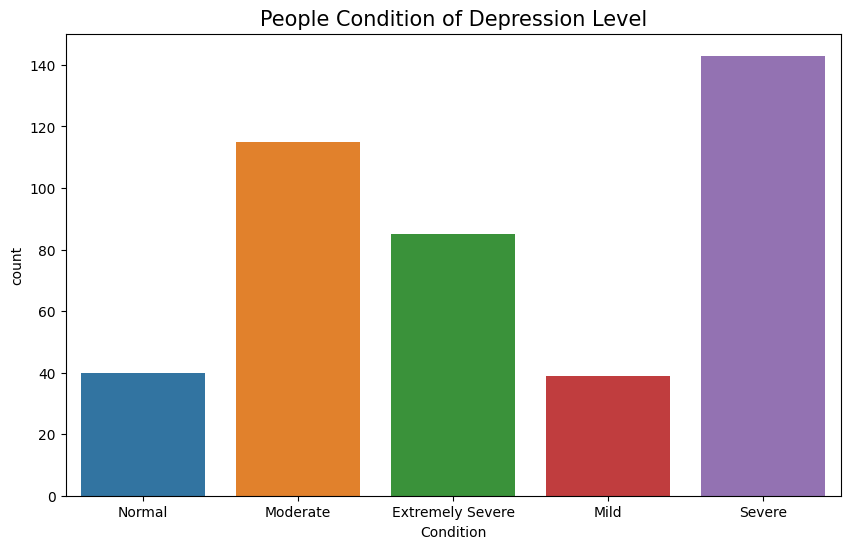

In [14]:
#14
plt.figure(figsize=(10,6))
sns.countplot(data=depression, x='Condition')
plt.title('People Condition of Depression Level', fontsize=15)

##anxiety data show in graph at a glance

Text(0.5, 1.0, 'People Condition of Anxiety Level')

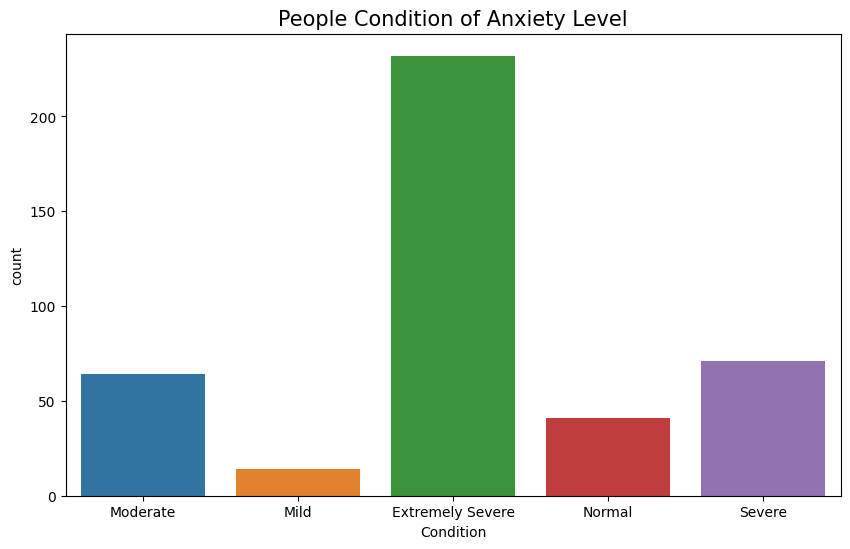

In [15]:
#15
plt.figure(figsize=(10,6))
sns.countplot(data=anxiety, x='Condition')
plt.title('People Condition of Anxiety Level', fontsize=15)

##Stress data show in graph at a glance

Text(0.5, 1.0, 'People Condition of Stress Level')

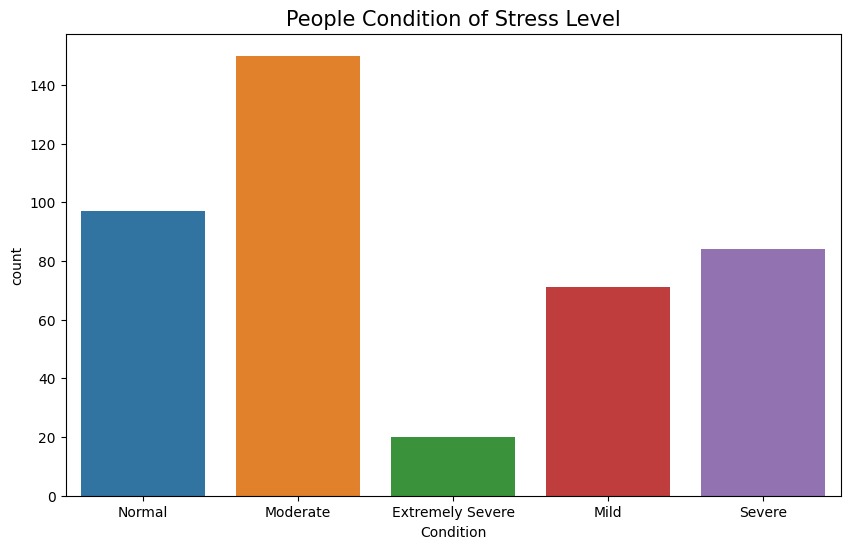

In [16]:
#16
plt.figure(figsize=(10,6))
sns.countplot(data=stress, x='Condition')
plt.title('People Condition of Stress Level', fontsize=15)

##model depression

In [17]:
#17
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
import pickle

In [18]:
#18
datasetDepression = pd.read_csv('/content/drive/MyDrive/all_thesis_files/optimizeCode/depression.csv')

In [19]:
datasetDepression

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Condition
0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,Normal
1,1,0,2,1,3,1,2,2,1,1,1,1,2,2,Moderate
2,2,1,3,2,3,2,2,2,2,2,1,2,2,2,Extremely Severe
3,0,0,0,2,0,0,0,0,0,0,0,0,0,1,Normal
4,2,1,0,2,3,2,3,3,3,3,3,1,1,1,Extremely Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2,2,2,0,1,3,3,1,3,2,2,0,3,1,Severe
418,2,3,3,0,2,0,0,0,3,3,1,3,3,3,Severe
419,3,1,3,2,3,3,2,1,2,0,3,2,3,2,Extremely Severe
420,2,1,3,3,1,3,3,1,0,3,0,0,1,0,Severe


In [20]:
#19
# traing dataset and testing dataset seperate
datasetDepression=datasetDepression.sample(frac=True)
X= datasetDepression.iloc[:,:-1].values
Y= datasetDepression.iloc[:,-1:].values.ravel()

In [21]:
#20
x_train, x_test, y_train, y_test=train_test_split(X,Y,random_state=10,test_size=0.2)


In [22]:
#21
model_svm= SVC()

In [ ]:
#22
# fit the model for depression
model_svm=SVC(kernel="linear")
model_SVC= model_svm.fit(x_train,y_train)
prediction= model_SVC.predict(x_test)
accuracy= accuracy_score(y_test,prediction)
print("Accuracy = ",accuracy)
cross_val=cross_val_score(model_SVC, X, Y,cv=10)
sum_cross_val= cross_val.sum()
cv=sum_cross_val/10
print(cv)
precision,recall,f1,support=precision_recall_fscore_support(y_test,prediction, average="weighted")
print("Prec Recall F1 Supppor= ",precision_recall_fscore_support(y_test,prediction, average="weighted"))
print(classification_report(y_test, prediction))

#anxiety

In [ ]:
#23
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
import pickle

In [ ]:
#24
datasetAnxiety = pd.read_csv('/content/drive/MyDrive/all_thesis_files/optimizeCode/anxiety.csv')

In [ ]:
#25
datasetAnxiety

In [ ]:
#26
datasetAnxiety=datasetAnxiety.sample(frac=True)
X= datasetAnxiety.iloc[:,:-1].values
Y= datasetAnxiety.iloc[:,-1:].values.ravel()

In [ ]:
#27
x_train, x_test, y_train, y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

In [ ]:
#28
model_svm= SVC()

In [ ]:
#29
# fit the model
model_svm=SVC(kernel="linear")
model_SVC= model_svm.fit(x_train,y_train)
prediction= model_SVC.predict(x_test)
accuracy= accuracy_score(y_test,prediction)
print("Accuracy = ",accuracy)
cross_val=cross_val_score(model_SVC, X, Y,cv=10)
sum_cross_val= cross_val.sum()
cv=sum_cross_val/10
print(cv)
precision,recall,f1,support=precision_recall_fscore_support(y_test,prediction, average="weighted")
print("Prec Recall F1 Supppor= ",precision_recall_fscore_support(y_test,prediction, average="weighted"))
print(classification_report(y_test, prediction))

#stress

In [ ]:
#30
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
import pickle

In [ ]:
#31
datasetStress = pd.read_csv('/content/drive/MyDrive/all_thesis_files/optimizeCode/stress.csv')

In [ ]:
#32
datasetStress=datasetStress.sample(frac=True)
X= datasetStress.iloc[:,:-1].values
Y= datasetStress.iloc[:,-1:].values.ravel()

In [ ]:
#33
x_train, x_test, y_train, y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

In [ ]:
#34
model_svm= SVC()

In [ ]:
#35
# fit the model
model_svm=SVC(kernel="linear")
model_SVC= model_svm.fit(x_train,y_train)
prediction= model_SVC.predict(x_test)
accuracy= accuracy_score(y_test,prediction)
print("Accuracy = ",accuracy)
cross_val=cross_val_score(model_SVC, X, Y,cv=10)
sum_cross_val= cross_val.sum()
cv=sum_cross_val/10
print(cv)
precision,recall,f1,support=precision_recall_fscore_support(y_test,prediction, average="weighted")
print("Prec Recall F1 Supppor= ",precision_recall_fscore_support(y_test,prediction, average="weighted"))
print(classification_report(y_test, prediction))

In [ ]:
#36
import pickle

##sample input

In [ ]:
#37
Input=[ 2,1,1,2,2,3,3,2,2,1,2,2,3,1,1,1,3,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2]
# 2,1,1,2,2,3,3,2,2,1,2,2,3,1,1,1,3,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2
# 2,3,3,2,2,3,4,4,4,1,4,4,3,4,1,4,3,4,1,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,2,4,2,2,2
# 2,3,3,2,2,1,1,1,2,1,1,2,3,2,1,2,3,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1

In [ ]:
#38
with open("/content/drive/MyDrive/all_thesis_files/optimizeCode/Depression.pkl", 'rb') as file:
    load_modelDepression= pickle.load(file)

with open("/content/drive/MyDrive/all_thesis_files/optimizeCode/anxiety.pkl", 'rb') as file:
    load_modelAnxiety= pickle.load(file)

with open("/content/drive/MyDrive/all_thesis_files/optimizeCode/stress.pkl", 'rb') as file:
    load_modelStress= pickle.load(file)

In [ ]:
#39
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}

In [ ]:
#40
Depression=[]
Anxiety=[]
Stress=[]

In [ ]:
#41
for i in range(0,14):
    Depression.append(Input[DASS_keys['Depression'][i]-1])
    Anxiety.append(Input[DASS_keys['Anxiety'][i]-1])
    Stress.append(Input[DASS_keys['Stress'][i]-1])

In [ ]:
#42
predictionDepression=load_modelDepression.predict([Depression])
print("Depression Level = ", predictionDepression)

predictionAnxiety=load_modelAnxiety.predict([Anxiety])
print("Anxiety Level = ",predictionAnxiety)

predictionStress=load_modelStress.predict([Stress])
print("Stress Level = ",predictionStress)